# Agglomerative Clustering

É um algoritmo de clusterização, por isso também uma técnica não supervisionada!  
  
Está inserido dentro dos algoritmos chamados `Hierarchical Clustering`.  

### Hierarchical clustering

O clustering hierárquico (também chamado de análise de cluster hierárquica ou HCA) é um método de análise de cluster que busca construir uma hierarquia de clusters.

Existem 2 tipos de agrupamento hierárquico:
- <b> Aglomerativo </b> (de baixo para cima) e
- <b> Divisivo </b> (de cima para baixo).

Os algoritmos ascendentes tratam cada ponto de dados como um único cluster e mesclam os clusters mais próximos e sobem na hierarquia até que todos os clusters tenham sido mesclados e haja apenas um único cluster com todos os pontos de dados restantes.

Os algoritmos de cima para baixo são o oposto dos algoritmos de baixo para cima. Eles começam com um cluster que contém todos os pontos de dados e, em seguida, executa divisões e desce na hierarquia. Podemos visualizar a hierarquia usando um <a href="https://en.wikipedia.org/wiki/Dendrogram"> dendrograma </a> ou árvore.

No gráfico abaixo, você pode ver um exemplo de como funciona o agrupamento hierárquico ascendente.

![](https://camo.githubusercontent.com/ba07835dc2aba40a6644db39c9f9a595097ae25c/68747470733a2f2f6d656469612e67697068792e636f6d2f6d656469612f70534e435743454173677241732f67697068792e676966)   
Passos (aglomerativo):
1. Trate cada ponto de dados como um único cluster.
2. Escolha uma medida de similaridade / dissimilaridade (métrica de distância como distância euclidiana, como uma medida de similaridade, e um critério de ligação que especifica a dissimilaridade de conjuntos como uma função das distâncias entre pares de observações).
3. Combine os dois clusters com a menor ligação, ou seja, os dois clusters que estão mais próximos de acordo com nossa medida escolhida.
4. Repita 3 até que tenhamos apenas um cluster com todos os pontos de dados.
5. Escolha quantos aglomerados queremos olhando para o dendrograma.

<img style="height:600px;"  src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Iris_dendrogram.png/800px-Iris_dendrogram.png">

- O clustering hierárquico não exige que especifiquemos o número de clusters e podemos até selecionar qual número de clusters parece melhor, já que estamos construindo uma árvore.
- Além disso, o algoritmo não é sensível à escolha da métrica de distância; todos eles tendem a funcionar igualmente bem, enquanto com outros algoritmos de agrupamento, a escolha da métrica de distância é crítica.
- Um caso de uso particularmente bom de métodos de agrupamento hierárquico é quando os dados subjacentes têm uma estrutura hierárquica e você deseja recuperar a hierarquia; outros algoritmos de cluster não podem fazer isso.
- Essas vantagens do agrupamento hierárquico têm o custo de menor eficiência, pois tem uma complexidade de tempo de O (n³), ao contrário da complexidade linear do K-Means

PS. O objeto AgglomerativeClustering executa um agrupamento hierárquico usando uma abordagem ascendente: cada observação começa em seu próprio cluster, e os clusters são sucessivamente mesclados. Os critérios de ligação determinam a métrica usada para a estratégia de fusão:
- **Ward** minimiza a soma das diferenças quadradas em todos os clusters. É uma abordagem de minimização de variância e, nesse sentido, é semelhante à função objetivo k-médias, mas tratada com uma abordagem hierárquica aglomerativa.
- **A ligação máxima ou completa** minimiza a distância máxima entre as observações de pares de agrupamentos.
- **A ligação média** minimiza a média das distâncias entre todas as observações de pares de agrupamentos.
- **A ligação única** minimiza a distância entre as observações mais próximas de pares de clusters.

![](https://drek4537l1klr.cloudfront.net/rhys/Figures/fig17-3_alt.jpg)

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_0011.png)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
dados = {
    'valores': [
        [1.0, 1.0],
        [1.5, 1.5],
        [5.0, 5.0],
        [3.0, 4.0],
        [4.0, 4.0],
        [3.0, 3.5]
    ],
    'indices': [
        'A',
        'B',
        'C',
        'D',
        'E',
        'F'
    ],
    'colunas': [
        'x1',
        'x2'
    ]
}

In [17]:
df = pd.DataFrame(
    data=dados['valores'],
    columns=dados['colunas'],
    index=dados['indices']
)
df

,x1,x2
A,1.0,1.0
B,1.5,1.5
C,5.0,5.0
D,3.0,4.0
E,4.0,4.0
F,3.0,3.5


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html

In [18]:
from sklearn.metrics.pairwise import euclidean_distances

In [19]:
matriz_distancias = euclidean_distances(df, df)

In [20]:
print(matriz_distancias)

[[0.         0.70710678 5.65685425 3.60555128 4.24264069 3.20156212]
 [0.70710678 0.         4.94974747 2.91547595 3.53553391 2.5       ]
 [5.65685425 4.94974747 0.         2.23606798 1.41421356 2.5       ]
 [3.60555128 2.91547595 2.23606798 0.         1.         0.5       ]
 [4.24264069 3.53553391 1.41421356 1.         0.         1.11803399]
 [3.20156212 2.5        2.5        0.5        1.11803399 0.        ]]


In [21]:
X = df.values

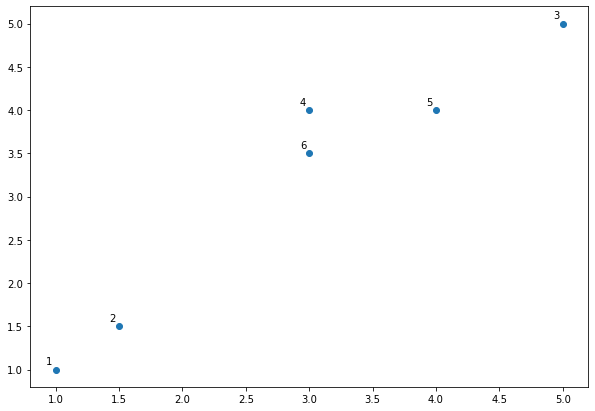

In [22]:
labels = range(1, 7)

plt.figure(figsize=(10, 7))
# plt.subplots_adjust(bottom=0.1)

plt.scatter(X[:,0], X[:,1], label='True Postion')

for label, x, y in zip(labels, X[:,0], X[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom'
    )
plt.show()

Exemplo:
    
![](https://researchhubs.com/uploads/agglomerative%20numerical%20example%2019.jpg)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X)

In [24]:
linked

array([[3.        , 5.        , 0.5       , 2.        ],
       [0.        , 1.        , 0.70710678, 2.        ],
       [4.        , 6.        , 1.        , 3.        ],
       [2.        , 8.        , 1.41421356, 4.        ],
       [7.        , 9.        , 2.5       , 6.        ]])

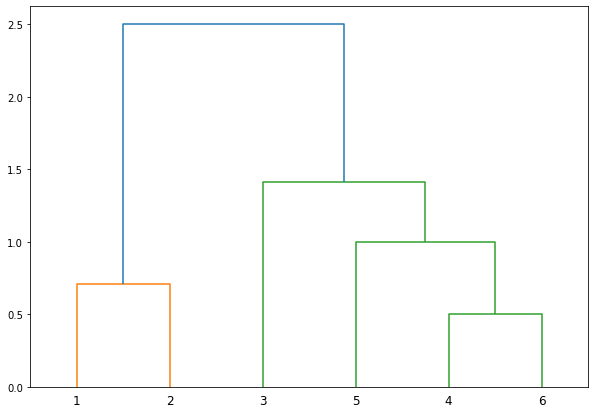

In [25]:
plt.figure(figsize=(10, 7))

dendrogram(
    linked,
    orientation='top',
    labels=labels,
    show_leaf_counts=True
)

plt.show()

Um exemplo mais complexo...

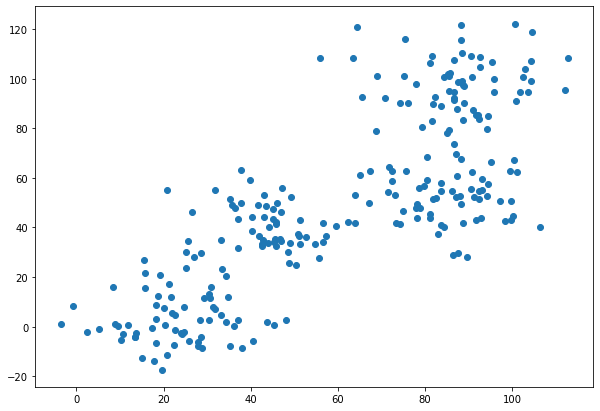

In [26]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=250, random_state=8, centers=4,
                 center_box=[0, 100], cluster_std=10)

plt.figure(figsize=(10, 7))

plt.scatter(X[:,0], X[:,1])

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [27]:
from sklearn.cluster import AgglomerativeClustering

estimador = AgglomerativeClustering(n_clusters=4, linkage='ward')
estimador.fit(X)

AgglomerativeClustering(n_clusters=4)

In [28]:
labels = estimador.labels_
labels

array([0, 0, 3, 0, 1, 0, 0, 3, 3, 2, 0, 0, 0, 1, 0, 2, 0, 3, 1, 1, 2, 2,
       2, 0, 1, 1, 0, 0, 2, 3, 0, 0, 1, 2, 1, 3, 0, 2, 3, 0, 3, 1, 1, 2,
       1, 2, 1, 1, 3, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 3, 0, 0, 1, 0, 2, 0,
       1, 0, 1, 2, 0, 3, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 2, 1,
       0, 2, 0, 2, 2, 1, 2, 1, 1, 3, 3, 1, 3, 2, 1, 1, 0, 3, 0, 1, 1, 1,
       2, 1, 0, 3, 3, 0, 1, 0, 2, 2, 3, 1, 2, 3, 3, 1, 2, 2, 1, 2, 3, 1,
       3, 3, 3, 3, 1, 2, 1, 2, 0, 2, 1, 1, 1, 3, 1, 0, 0, 2, 3, 1, 0, 1,
       3, 0, 2, 2, 1, 0, 1, 3, 0, 0, 1, 3, 2, 2, 3, 0, 2, 3, 3, 3, 1, 3,
       2, 0, 1, 3, 1, 2, 0, 0, 1, 3, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 2,
       2, 2, 3, 3, 1, 2, 0, 3, 1, 2, 0, 3, 0, 1, 0, 2, 1, 3, 3, 1, 0, 0,
       3, 2, 2, 1, 3, 3, 0, 0, 3, 0, 3, 2, 3, 3, 2, 0, 2, 3, 3, 0, 3, 0,
       0, 2, 1, 3, 0, 1, 2, 2], dtype=int64)

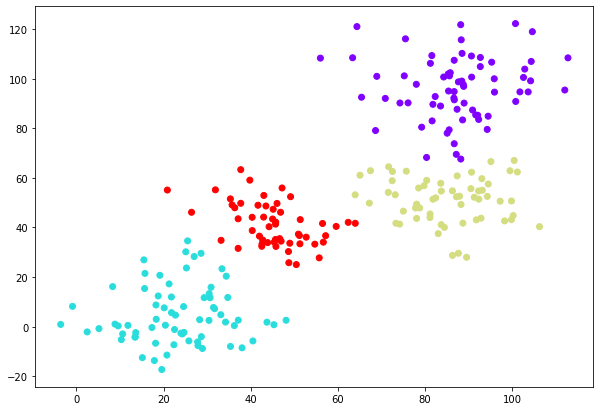

In [29]:
plt.figure(figsize=(10, 7))

_ = plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 2 The average silhouette_score is : 0.4936782903414803
For n_clusters = 3 The average silhouette_score is : 0.5059026486271216
For n_clusters = 4 The average silhouette_score is : 0.5460261889638311
For n_clusters = 5 The average silhouette_score is : 0.47372469739385215
For n_clusters = 6 The average silhouette_score is : 0.4016982127723863


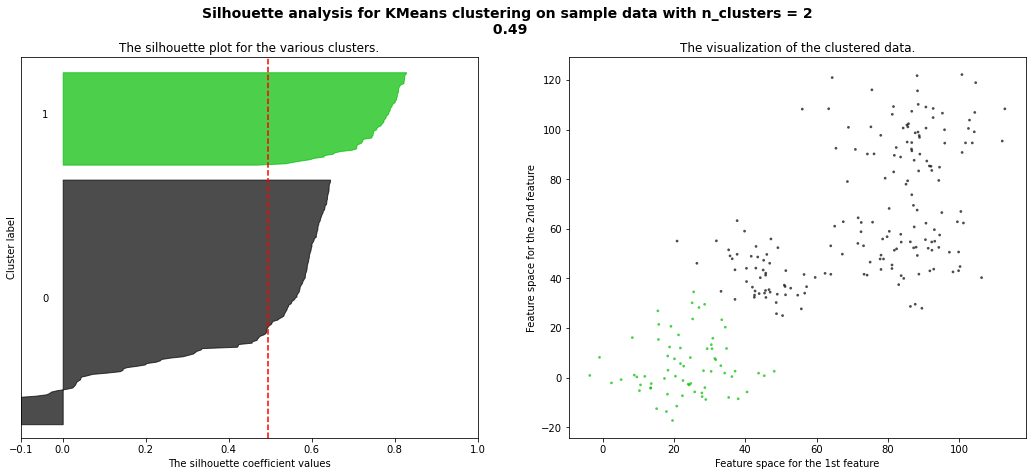

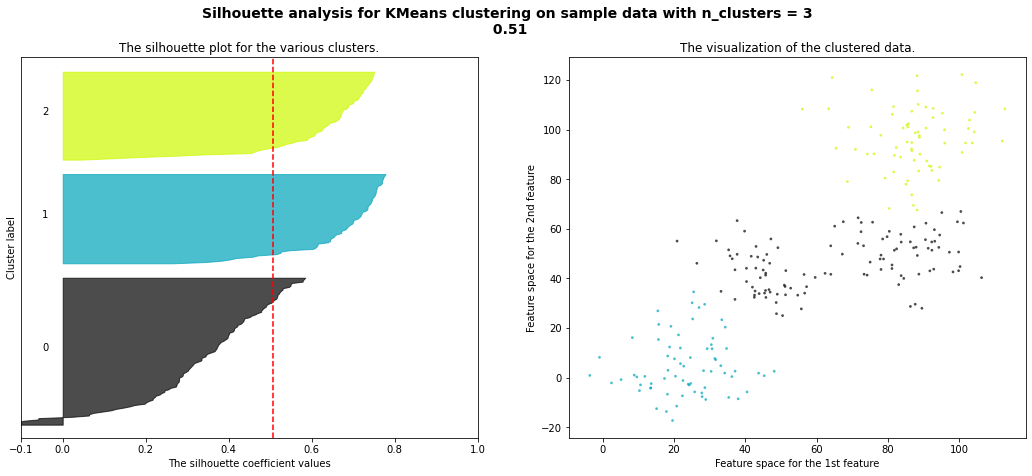

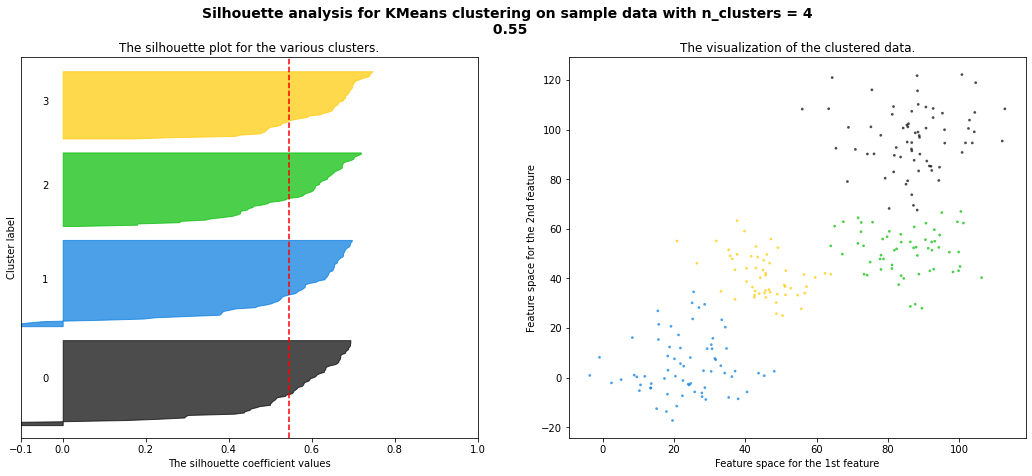

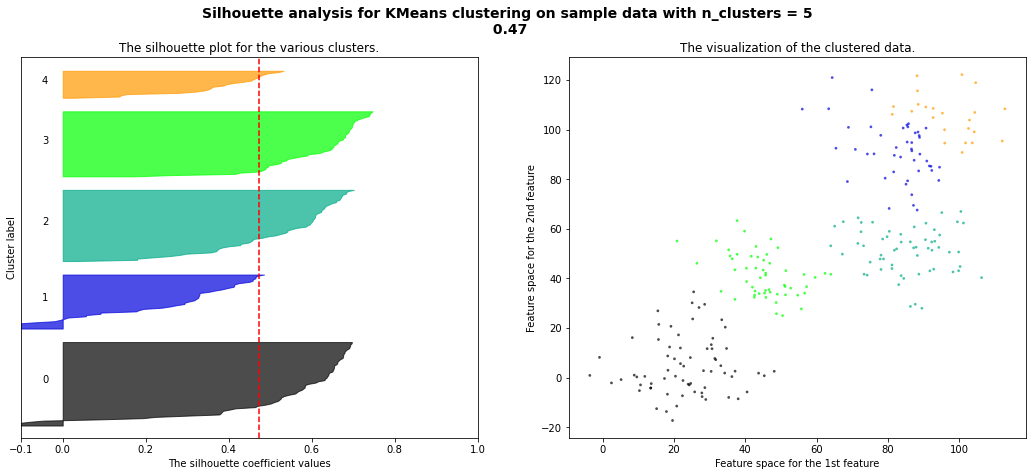

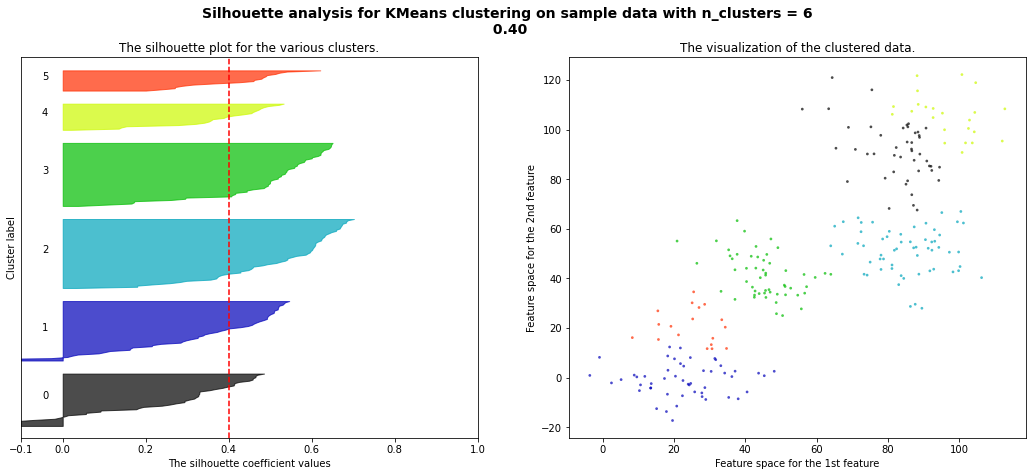

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
#     centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
#     ax2.scatter(
#         centers[:, 0],
#         centers[:, 1],
#         marker="o",
#         c="white",
#         alpha=1,
#         s=200,
#         edgecolor="k",
#     )

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = {}\n {:.2f}".format(n_clusters, silhouette_avg),
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Uma animação mais interativa:  
https://educlust.dbvis.de/#  

In [31]:
data = []
for vetor in X:
    data.append({'x': vetor[0], 'y': vetor[1]})
data

[{'x': 104.36323983588908, 'y': 106.91500330753891},
 {'x': 103.66594556448082, 'y': 94.62667483859431},
 {'x': 49.15352847096885, 'y': 52.409013999041875},
 {'x': 88.7798504592611, 'y': 97.60956069544979},
 {'x': 34.75180954311704, 'y': 11.799244328217142},
 {'x': 63.39080887567782, 'y': 108.39423104114675},
 {'x': 80.35057842149126, 'y': 68.21784962020766},
 {'x': 46.04536364502022, 'y': 49.69669272314716},
 {'x': 46.85955551802808, 'y': 46.13205959132715},
 {'x': 97.23851956999206, 'y': 50.59222211322218},
 {'x': 88.30465596541161, 'y': 115.62222048489969},
 {'x': 65.43723539820937, 'y': 92.49334563414949},
 {'x': 85.60045814273529, 'y': 101.09458049241043},
 {'x': 21.28164771491941, 'y': 17.263784773293477},
 {'x': 86.69727194437529, 'y': 73.74493194716302},
 {'x': 93.14099500792483, 'y': 55.00780662114699},
 {'x': 75.23876794279697, 'y': 101.09648144314944},
 {'x': 42.599239355899535, 'y': 33.310605562978765},
 {'x': 31.46695650349675, 'y': 7.761653190821358},
 {'x': 34.2350945628

In [32]:
len(data)

250

In [33]:
data_set = {
    'dataset_name': 'exemplo',
    'data': data
}

data_set

{'dataset_name': 'exemplo',
 'data': [{'x': 104.36323983588908, 'y': 106.91500330753891},
  {'x': 103.66594556448082, 'y': 94.62667483859431},
  {'x': 49.15352847096885, 'y': 52.409013999041875},
  {'x': 88.7798504592611, 'y': 97.60956069544979},
  {'x': 34.75180954311704, 'y': 11.799244328217142},
  {'x': 63.39080887567782, 'y': 108.39423104114675},
  {'x': 80.35057842149126, 'y': 68.21784962020766},
  {'x': 46.04536364502022, 'y': 49.69669272314716},
  {'x': 46.85955551802808, 'y': 46.13205959132715},
  {'x': 97.23851956999206, 'y': 50.59222211322218},
  {'x': 88.30465596541161, 'y': 115.62222048489969},
  {'x': 65.43723539820937, 'y': 92.49334563414949},
  {'x': 85.60045814273529, 'y': 101.09458049241043},
  {'x': 21.28164771491941, 'y': 17.263784773293477},
  {'x': 86.69727194437529, 'y': 73.74493194716302},
  {'x': 93.14099500792483, 'y': 55.00780662114699},
  {'x': 75.23876794279697, 'y': 101.09648144314944},
  {'x': 42.599239355899535, 'y': 33.310605562978765},
  {'x': 31.466956

In [34]:
import json

json.dumps(data_set)

with open('exemplo.json', 'w') as f:
    json.dump(data_set, f)

In [35]:
!cat exemplo.json

'cat' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


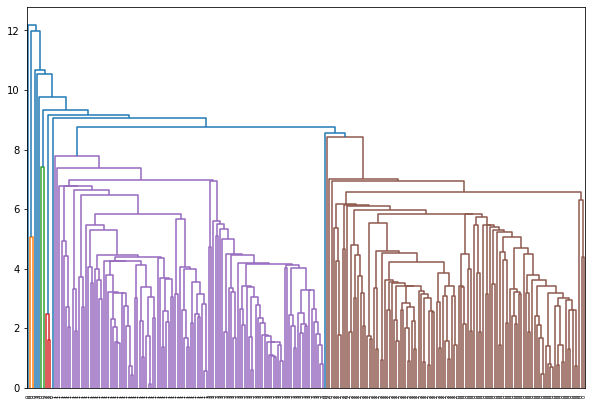

In [36]:
linked = linkage(X)
plt.figure(figsize=(10, 7))

dendrogram(
    linked,
    orientation='top',
    labels=labels,
    show_leaf_counts=True
)

plt.show()

Dicas:  
    - Estudar sobre `Modelos Mistura de Gaussianas (GMM)`

#### Exercício
Aplique a clusterização aglomerativa no data set de vinhos e verifique o desempenho em relação ao K-Means

In [37]:
wine = pd.read_csv("datasets/winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
wine.shape

(1599, 12)

In [39]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [40]:
# calcular as distâncias euclidianas
from sklearn.metrics.pairwise import euclidean_distances

matriz_distancias = euclidean_distances(wine, wine)

In [41]:
matriz_distancias

array([[6.74349576e-07, 3.58601922e+01, 2.04097050e+01, ...,
        1.91056851e+01, 2.33225970e+01, 1.10366429e+01],
       [3.58601922e+01, 0.00000000e+00, 1.64045889e+01, ...,
        2.73859012e+01, 2.41316795e+01, 2.61010203e+01],
       [2.04097050e+01, 1.64045889e+01, 0.00000000e+00, ...,
        1.99197504e+01, 1.98237135e+01, 1.26797093e+01],
       ...,
       [1.91056851e+01, 2.73859012e+01, 1.99197504e+01, ...,
        0.00000000e+00, 5.18964605e+00, 1.12669730e+01],
       [2.33225970e+01, 2.41316795e+01, 1.98237135e+01, ...,
        5.18964605e+00, 0.00000000e+00, 1.42996395e+01],
       [1.10366429e+01, 2.61010203e+01, 1.26797093e+01, ...,
        1.12669730e+01, 1.42996395e+01, 0.00000000e+00]])

In [42]:
X = wine.values

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X)

In [44]:
linked

array([[0.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.37900000e+03, 1.38000000e+03, 0.00000000e+00, 2.00000000e+00],
       [9.90000000e+01, 1.02000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.18500000e+03, 3.19300000e+03, 1.67767604e+01, 1.59600000e+03],
       [1.24400000e+03, 3.19400000e+03, 2.62061216e+01, 1.59700000e+03],
       [3.18900000e+03, 3.19500000e+03, 1.13270300e+02, 1.59900000e+03]])

In [45]:
from sklearn.cluster import AgglomerativeClustering

estimador = AgglomerativeClustering(n_clusters=4, linkage='ward')
estimador.fit(X)

AgglomerativeClustering(n_clusters=4)

In [48]:
labels = estimador.labels_
labels

array([1, 2, 1, ..., 1, 2, 1], dtype=int64)

For n_clusters = 2 The average silhouette_score is : 0.572617564993701
For n_clusters = 3 The average silhouette_score is : 0.4588550686129231
For n_clusters = 4 The average silhouette_score is : 0.38558150182770984
For n_clusters = 5 The average silhouette_score is : 0.3995712592642417
For n_clusters = 6 The average silhouette_score is : 0.4011622170633315


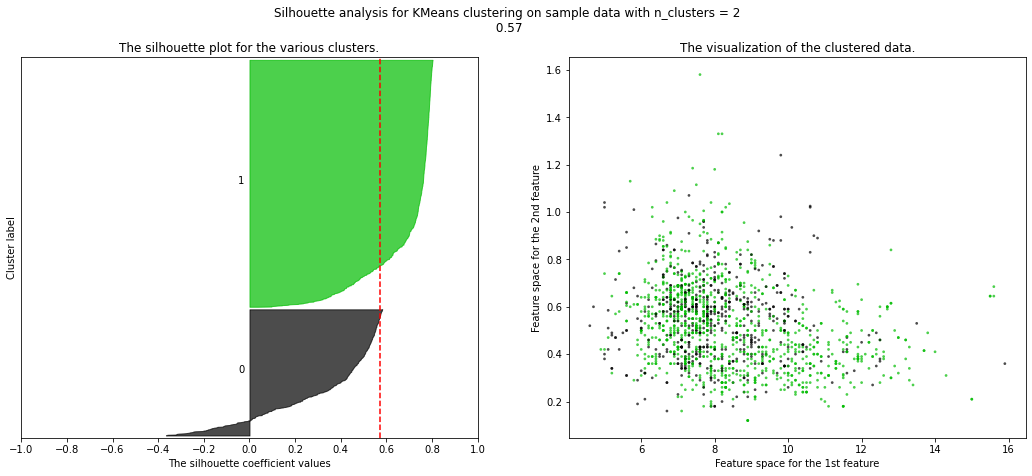

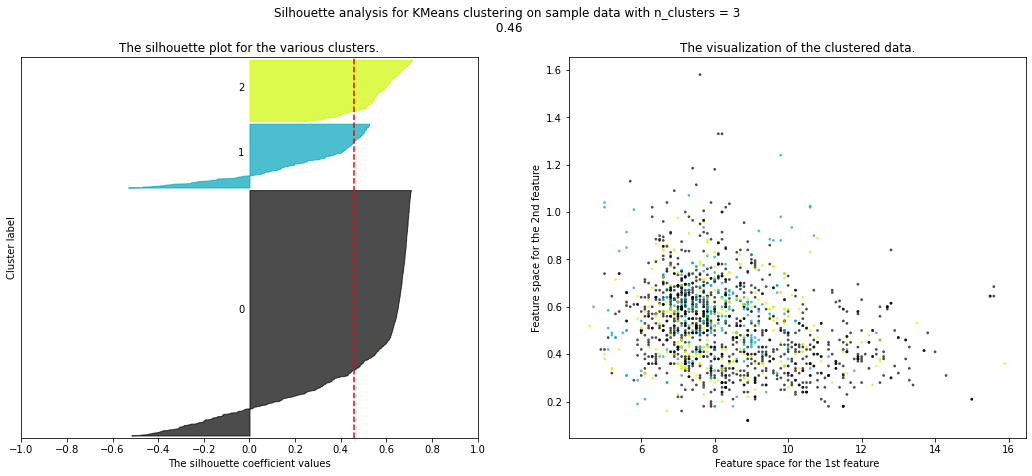

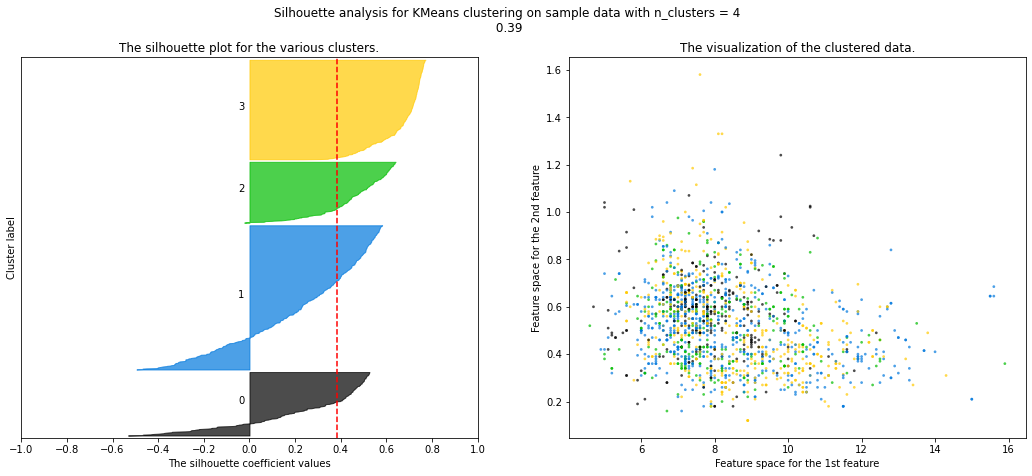

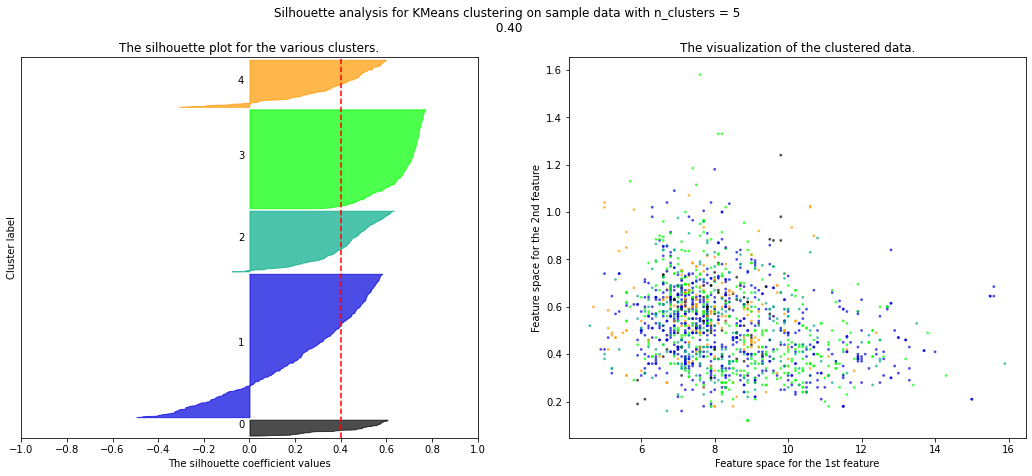

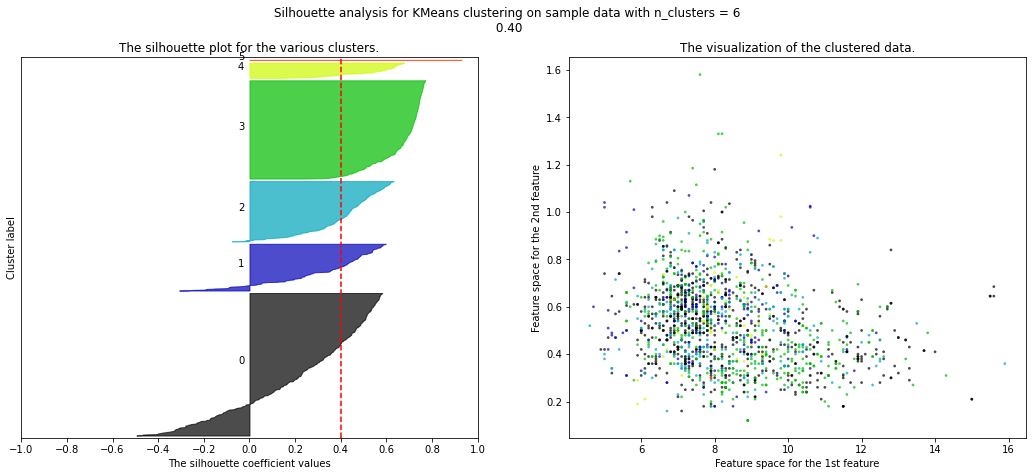

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    ax1.set_xlim([-1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = {}\n {:.2f}".format(n_clusters, silhouette_avg)
    )

plt.show()

# Preparação para a Avaliação e Projeto